I will be analysing the AFCON final based of shots taken, Expected goals (xG) and Expected goals on Target (xGot)
Let's do thissssssss

In [21]:
# install highlight-text py package by Peter McKeever's and Danzn's
pip install highlight-text

In [22]:
#import all neccessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from statsbombpy import sb 
from mplsoccer import Pitch, VerticalPitch
from mplsoccer import Sbopen
import matplotlib.image as mpimg

In [2]:
# Retrieve competition data using the StatsBomb API
sb.competitions()


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-14T05:41:27.566989,None,None,2024-02-14T05:41:27.566989
2,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
3,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
4,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
66,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
67,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
68,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-10-24T03:36:54.066267,2023-10-24T03:37:29.085948,2023-10-24T03:37:29.085948,2023-10-24T03:36:54.066267
69,72,107,International,Women's World Cup,female,False,True,2023,2023-12-12T14:06:50.626363,2023-12-12T14:12:41.561162,2023-12-12T14:12:41.561162,2023-12-12T14:06:50.626363


In [3]:
# Parse the data using StatsBomb parser
parser = Sbopen()

# Retrieve match data for the AFCON competition and season
afcon_df = parser.match(competition_id=1267, season_id=107)


,match_id,match_date,home_team_name,away_team_name
0,3923881,2024-02-11,Nigeria,Côte d'Ivoire
1,3923880,2024-02-10,South Africa,Congo DR
2,3922838,2024-02-07,Côte d'Ivoire,Congo DR
3,3922837,2024-02-07,Nigeria,South Africa
4,3922242,2024-01-29,Senegal,Côte d'Ivoire
5,3922239,2024-01-28,Equatorial Guinea,Guinea
6,3922659,2024-02-03,Mali,Côte d'Ivoire
7,3922658,2024-02-03,Cape Verde Islands,South Africa
8,3922244,2024-01-30,Mali,Burkina Faso
9,3922356,2024-02-02,Congo DR,Guinea


In [4]:
# Parse the data using StatsBomb parser
parser = Sbopen()
df, related_events, freeze_frame, tactics = parser.event(3923881)

# Get unique team names from the DataFrame
team1, team2 = df.team_name.unique()

# create AFCON shots dataframe and display the columns
df_shots = df.loc[df['type_name'] == 'Shot'].set_index('id')
df_shots.columns

Index(['index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'under_pressure',
       'outcome_id', 'outcome_name', 'aerial_won', 'off_camera',
       'counterpress', 'pass_switch', 'foul_won_defensive',
       'pass_assisted_shot_id', 'pass_shot_assist', 'shot_statsbomb_xg',
       'shot_key_pass_id', 'technique_id', 'technique_name',
       'goalkeeper_position_id', 'goalkeeper_position_name', 'pass_cross',
       'end_z', 'shot_first_time', 'dribble_overrun',
       'ball_recovery_recove

In [ ]:
# The columns in the df_shots DataFrame include:
# id: Unique identifier for each shot
# index: Index of the shot in the DataFrame
# period: Period in which the shot occurred
# timestamp: Timestamp of the shot
# minute: Minute of the match in which the shot occurred
# second: Second of the match in which the shot occurred
# type_name: Type of the event (e.g., "Shot")
# possession_team: Team in possession when the shot occurred
# play_pattern_name: Play pattern leading to the shot
# team_name: Team taking the shot
# player_name: Name of the player taking the shot
# position_name: Position of the player taking the shot
# location: Location of the shot (x, y coordinates)
# shot_type_name: Type of the shot (e.g., "Open Play", "Penalty")
# outcome_name: Outcome of the shot (e.g., "Goal", "Saved", "Blocked")
# shot_statsbomb_xg: Expected goals value for the shot
# shot_end_location: End location of the shot (x, y coordinates)
# body_part_name: Body part used for the shot (e.g., "Right Foot", "Left Foot")

How many shots were taken and what was the outcome of the shots taken by both teams?

In [54]:
#Display the shots taken by both teams and the outcomes
outcome_shots = df_shots.groupby(['outcome_name', 'team_name']).size().reset_index(name='count')
outcome_shots 

,outcome_name,team_name,count
0,Blocked,Côte d'Ivoire,3
1,Blocked,Nigeria,2
2,Goal,Côte d'Ivoire,2
3,Goal,Nigeria,1
4,Off T,Côte d'Ivoire,5
5,Off T,Nigeria,1
6,Saved,Côte d'Ivoire,5
7,Wayward,Côte d'Ivoire,3
8,Wayward,Nigeria,1


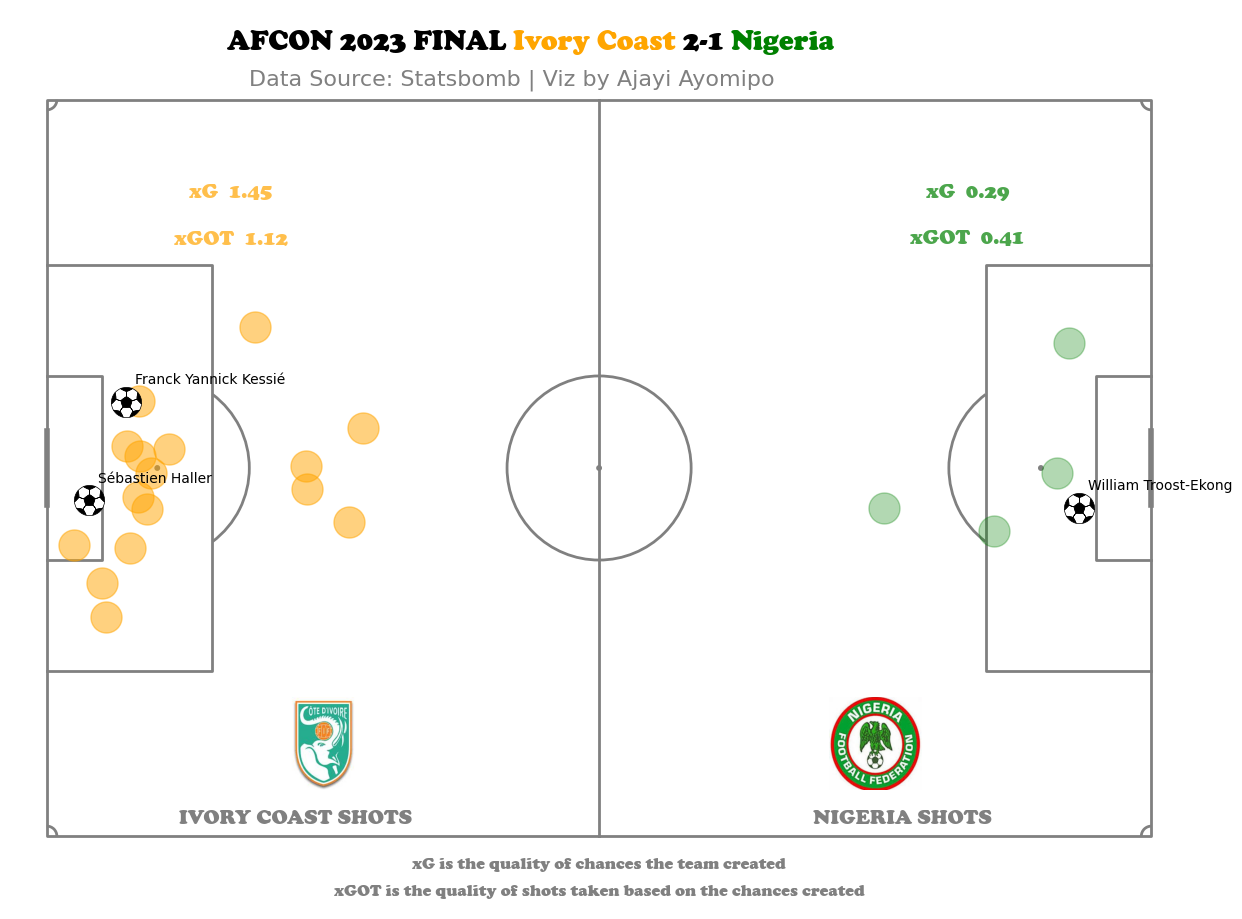

In [62]:
#Load the logos of Ivory Coast and Nigeria
elephants = mpimg.imread('Elephants logo.jpg')  # Ivory coast's logo
super_eagles = mpimg.imread('super eagles logo.jpg')  # Nigeria's logo

#create pitch
#using the MPL soccer pitch
pitch = Pitch(line_color='grey', corner_arcs=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)


ax['pitch'].imshow(elephants, extent=(25, 35, 65, 75), aspect='auto', origin='lower')
ax['pitch'].imshow(super_eagles, extent=(85, 95, 65, 75), aspect='auto',  origin='lower')

#Add context and viz details
ax['pitch'].text(100, 10, "xG  0.29", color='green', alpha=0.7, fontsize=15, ha='center', va='center', fontfamily='Cooper Black', fontweight='light')
ax['pitch'].text(20, 10, "xG  1.45", color='orange', alpha=0.7, fontsize=15, ha='center', va='center', fontfamily='Cooper Black', fontweight='light')

ax['pitch'].text(100, 15, "xGOT  0.41", color='green', alpha=0.7, fontsize=15, ha='center', va='center', fontfamily='Cooper Black', fontweight='light')
ax['pitch'].text(20, 15, "xGOT  1.12", color='orange', alpha=0.7, fontsize=15, ha='center', va='center', fontfamily='Cooper Black', fontweight='light')

ax['pitch'].text(27, 78, "IVORY COAST SHOTS", color='grey', fontsize=15, ha='center', va='center',  fontfamily='Cooper Black')
ax['pitch'].text(93, 78, "NIGERIA SHOTS", color='grey', fontsize=15, ha='center', va='center',  fontfamily='Cooper Black')

# Add descriptions about xG and xGOT below the pitch
fig.text(0.5, 0.05, "xG is the quality of chances the team created", color='grey', fontsize=12, ha='center', va='center', weight='bold', fontfamily='Cooper Black')
fig.text(0.5, 0.02, "xGOT is the quality of shots taken based on the chances created", color='grey', fontsize=12, ha='center', va='center', weight='bold',fontfamily='Cooper Black')

#Create Nigeria's shots dataframe
mask_Nigeria = (df.type_name == 'Shot') & (df.team_name == team1)
df_Nigeria = df.loc[mask_Nigeria, ['x', 'y', 'outcome_name', "player_name","shot_statsbomb_xg"]]

# Plot Nigeria's shots on the pitch
for i, row in df_Nigeria.iterrows():
    if row["outcome_name"] == 'Goal':
        # Make circle
        pitch.scatter(row.x, row.y, alpha=1, s=500, marker="football", ax=ax['pitch'])
        pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize=10, fontweight='light')
    else:
        pitch.scatter(row.x, row.y, alpha=0.3, s=500, color="green", ax=ax['pitch'])

#create Ivory coast's shots dataframe        
mask_ivory_coast = (df.type_name == 'Shot') & (df.team_name == team2)
df_ivory_coast = df.loc[mask_ivory_coast, ['x', 'y', 'outcome_name', "player_name","shot_statsbomb_xg"]]

# Plot Ivory Coast's shots on the pitch
for i, row in df_ivory_coast.iterrows():
    if row["outcome_name"] == 'Goal':
        pitch.scatter(120 - row.x, 80 - row.y, alpha=1, s=500, marker="football", ax=ax['pitch'])
        pitch.annotate(row["player_name"], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize=10, fontweight='light')
    else:
        pitch.scatter(120 - row.x, 80 - row.y, alpha=0.5, s=500, color="orange", ax=ax['pitch'])

# Customize title label using Peter McKeever's and Danzn's highlight_text package
main_title = 'AFCON 2023 FINAL <Ivory Coast> 2-1 <Nigeria>'
fig_text(0.2, 0.95, main_title, fontsize=20, va='bottom', highlight_textprops=[{"color": "orange"}, {"color": "green"}], fontfamily='Cooper Black')

# Add additional text below the title
additional_text = 'Data Source: Statsbomb | Viz by Ajayi Ayomipo'
fig.text(0.43, 0.91, additional_text, fontsize=16, va='bottom', ha='center', color='grey')


# Save the visualization as an image and display it
plt.savefig("afcon_final_shots.png", dpi=300, bbox_inches='tight')
plt.show()


Ivory coast were definitely the better team, they had 18 shots while Nigeria had 5 shots,
Ivory coast also created more quality chances than Nigeria with an xG of 1.45 compared to 0.29
Ivory coast had better quality shots than Nigeria with an xGot of 1.12 compared to 0.41